In [2]:
# 回调函数

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
# 运行系统命令
!ls

keras01_classification_model.ipynb
keras02_classification_model-normalize.ipynb
keras03.ipynb
tf01_keras_classification_model.ipynb
tf02_keras_classification_model-normalize.ipynb
tf03_keras_classification_model-callbacks.ipynb
tf03_keras_regression.ipynb
tf04_keras_classification_model-dnn.ipynb
tf05_keras_classification_model-dnn-bn.ipynb
tf06_keras_classification_model-dnn-selu.ipynb
tf07_keras_classification_model-dnn-selu-dropout.ipynb
tf08_keras_regression-wide_deep.ipynb
tf09_keras_regression-wide_deep-subclass.ipynb
tf10_keras_regression-wide_deep-multi-input.ipynb
tf11_keras_regression-wide_deep-multi-output.ipynb
tf12_keras_regression-hp-search.ipynb
tf13_keras_regression-hp-search-sklearn.ipynb
tf2-checkpoint.ipynb
临时使用.ipynb


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
logdir='./callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
# 模型保存路径
output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
callbacks=[
    keras.callbacks.TensorBoard(logdir),#Tensorflow提供的画图工具
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),#保存模型的最佳参数
    # patience表示没有改善的epoch数，之后训练将停止  min_delta表示监视对象指标(默认val_loss)的最小改进值 绝对值小于该值视为未改进
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2),
]
# 没有触发EarlyStopping可以把epochs改大点
history=model.fit(x_train_scaled,y_train,epochs=100,
                 validation_data=(x_valid_scaled,y_valid),
                 callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9285 - accuracy: 0.6973 - val_loss: 0.6213 - val_accuracy: 0.7862
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5817 - accuracy: 0.7958 - val_loss: 0.5257 - val_accuracy: 0.8170
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5142 - accuracy: 0.8181 - val_loss: 0.4825 - val_accuracy: 0.8358
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4784 - accuracy: 0.8307 - val_loss: 0.4567 - val_accuracy: 0.8418
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4538 - accuracy: 0.8388 - val_loss: 0.4409 - val_accuracy: 0.8470
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4357 - accuracy: 0.8451 - val_loss: 0.4268 - val_accuracy: 0.8528
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4216 - accuracy: 0.8494 - val_loss: 0.4170 - val_ac

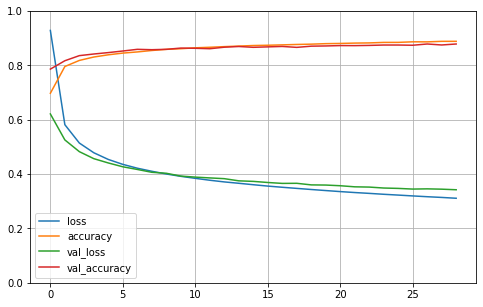

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [11]:
print(model.evaluate(x_test_scaled,y_test,verbose=0))

[0.37838834524154663, 0.8633000254631042]
